# Proyek Analisis Sentimen
- Nama: Muhammad Aldy Naufal Fadhilah
- Email: aldy.naufal02@gmail.com
- ID Dicoding: aldy_naufal

In [1]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


Sebelum memulai tahap pemrosesan data, saya terlebih dahulu menginstal semua dependensi yang dibutuhkan proyek dengan menjalankan perintah `%pip install -r ../requirements.txt`. Perintah ini akan membaca file `requirements.txt`, yang berisi daftar pustaka Python beserta versinya, lalu secara otomatis menginstalnya ke dalam lingkungan kerja agar semua modul dan fungsi yang diperlukan selama pemrosesan data dapat berjalan tanpa error.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import joblib
import os

Untuk mendukung proses pemrosesan dan pemodelan data, saya mengimpor berbagai pustaka Python yang dibutuhkan, seperti **pandas** dan **numpy** untuk manipulasi data, **matplotlib** dan **seaborn** untuk visualisasi, serta modul dari **scikit-learn** untuk preprocessing data, pembagian data, pemodelan, evaluasi, dan pencarian hyperparameter. Selain itu, saya juga mengimpor **TensorFlow** untuk membangun model neural network, **XGBoost** untuk pemodelan berbasis gradient boosting, serta **joblib** dan **os** untuk menyimpan model dan pengelolaan file. Semua pustaka ini memastikan saya dapat melakukan analisis data, membangun model machine learning, dan mengevaluasi performa model secara komprehensif dalam proyek ini.

## Exploratory Data Analysis

In [3]:
data = pd.read_csv('../data/jabodetabek_house_price.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [4]:
data.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


Saya menggunakan fungsi **`data.describe()`** untuk menampilkan **statistik deskriptif** dari kolom numerik dalam dataset. Fungsi ini memberikan gambaran umum seperti **jumlah data (count)**, **rata-rata (mean)**, **standar deviasi (std)**, **nilai minimum (min)**, **kuartil (25%, 50%, 75%)**, dan **nilai maksimum (max)**. Statistik ini membantu saya memahami **sebaran data**, mendeteksi adanya **outlier**, serta memberikan wawasan awal mengenai skala dan distribusi setiap fitur numerik sebelum masuk ke tahap analisis dan preprocessing lebih lanjut.


In [5]:
data.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Saya menggunakan **`data.head()`** untuk melihat **5 baris pertama** dari dataset. Perintah ini membantu saya mendapatkan **gambaran awal** tentang isi data, termasuk bagaimana **struktur kolom**, **contoh nilai** dalam setiap fitur, serta apakah ada pola atau format khusus yang perlu diperhatikan sebelum melanjutkan ke tahap eksplorasi dan pembersihan data lebih lanjut.


In [6]:
data.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

Saya menggunakan **`data.isnull().sum()`** untuk menghitung **jumlah nilai yang hilang (missing values)** di setiap kolom. Hasilnya menunjukkan bahwa beberapa kolom, seperti **`building_age`** dan **`year_built`**, memiliki **jumlah missing values yang cukup besar** (masing-masing 1445), disusul oleh **`building_orientation`** (1647) dan **`furnishing`** (387). Informasi ini penting untuk merancang strategi penanganan **data kosong**, seperti imputasi, penghapusan, atau pengabaian fitur, agar analisis dan pemodelan selanjutnya tidak terganggu oleh ketidaklengkapan data.


In [7]:
# Menampilkan semua baris yang sepenuhnya duplikat
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

# Menampilkan jumlah baris duplikat (tidak termasuk baris pertama dari duplikat)
print(f"Jumlah baris duplikat (selain baris pertama): {data.duplicated().sum()}")

Empty DataFrame
Columns: [url, price_in_rp, title, address, district, city, lat, long, facilities, property_type, ads_id, bedrooms, bathrooms, land_size_m2, building_size_m2, carports, certificate, electricity, maid_bedrooms, maid_bathrooms, floors, building_age, year_built, property_condition, building_orientation, garages, furnishing]
Index: []

[0 rows x 27 columns]
Jumlah baris duplikat (selain baris pertama): 0


Saya memeriksa apakah ada **baris yang sepenuhnya duplikat** dalam dataset menggunakan `data.duplicated(keep=False)` dan menghitung jumlahnya dengan `data.duplicated().sum()`. Hasilnya menunjukkan bahwa **tidak ada baris duplikat** di dataset ini, sehingga saya dapat melanjutkan ke tahap berikutnya tanpa perlu melakukan penghapusan data yang sama persis.


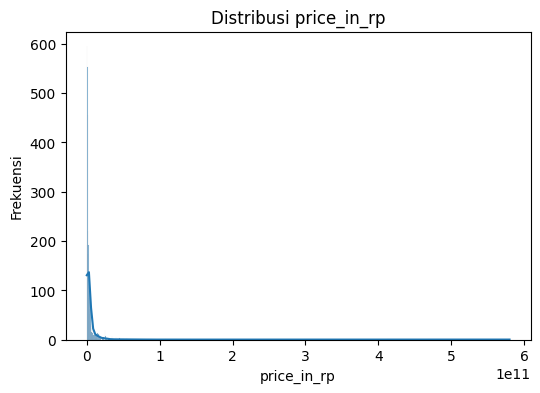

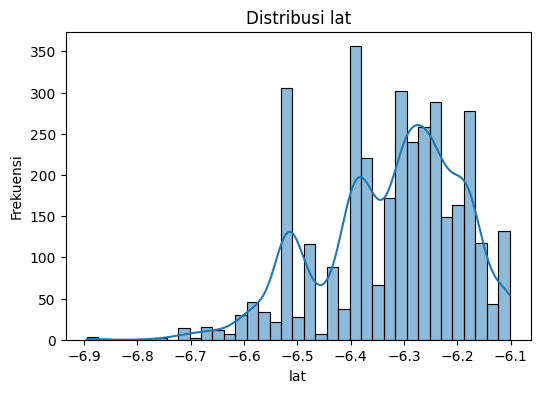

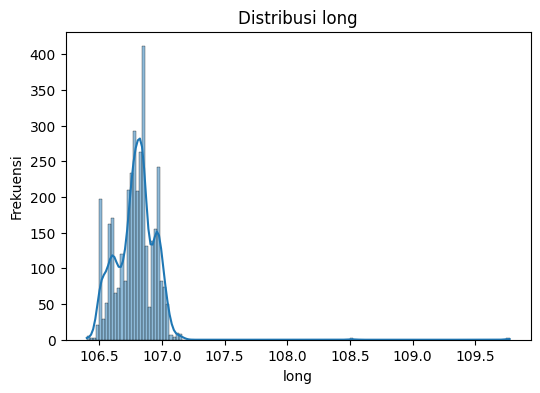

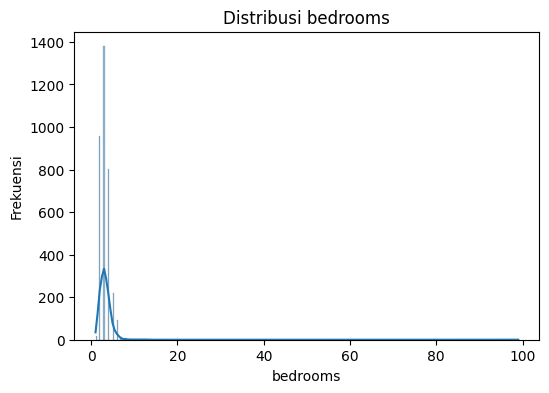

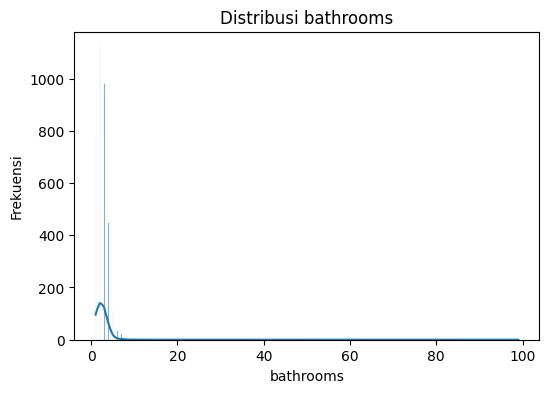

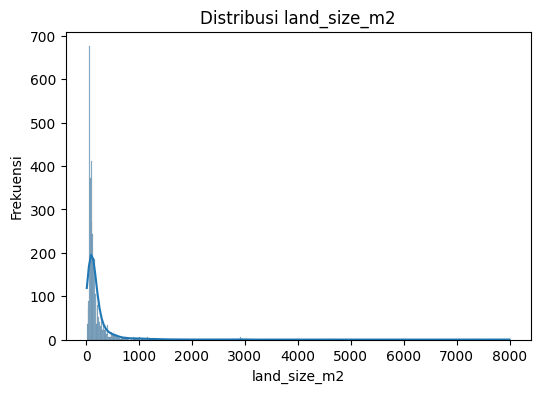

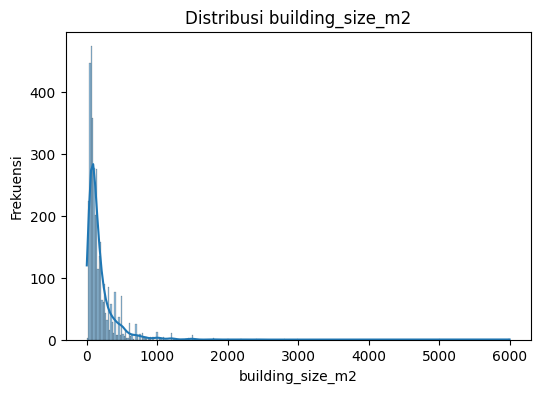

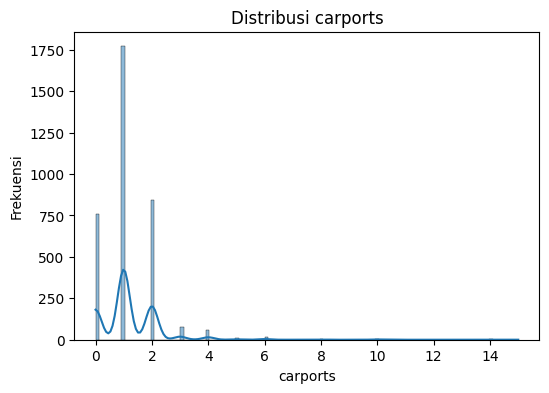

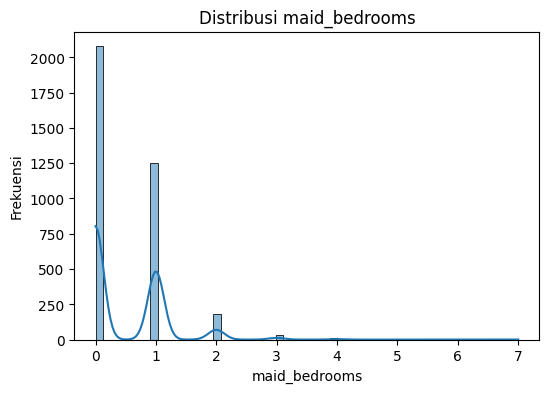

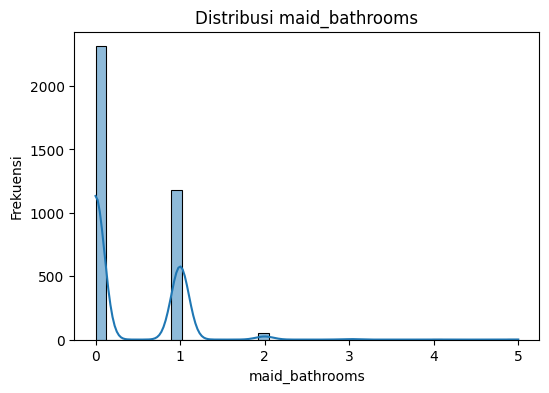

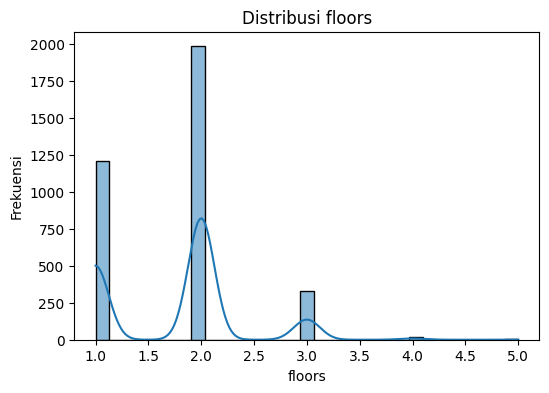

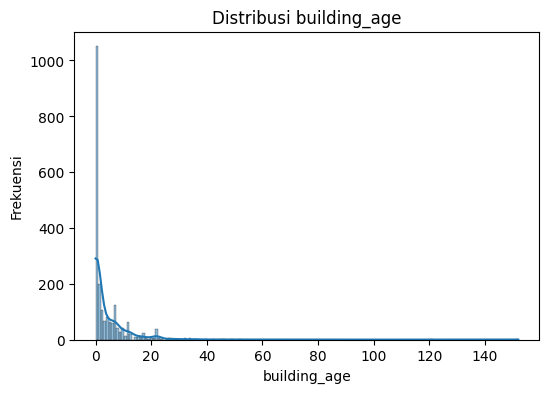

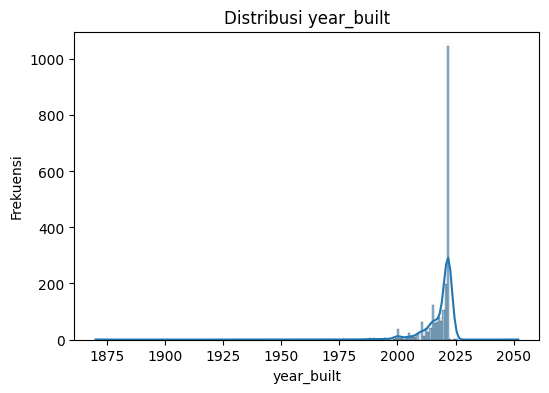

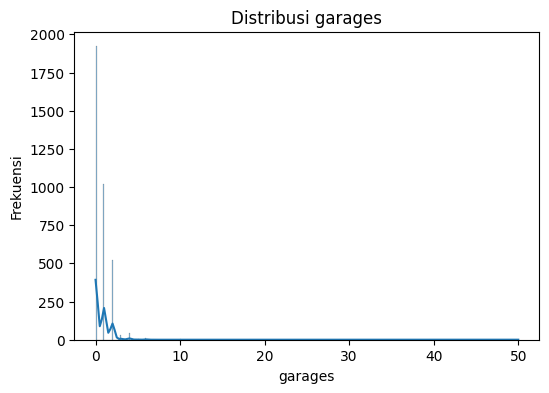

In [ ]:

# Histogram
num_cols = data.select_dtypes(include='float64').columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


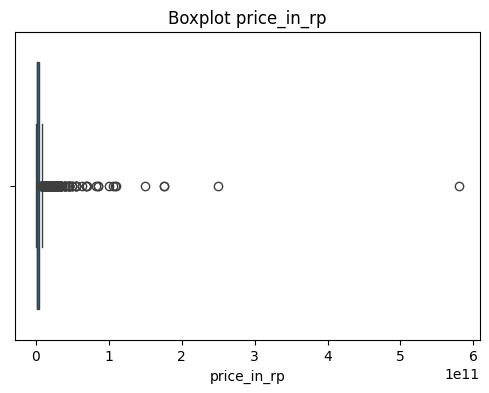

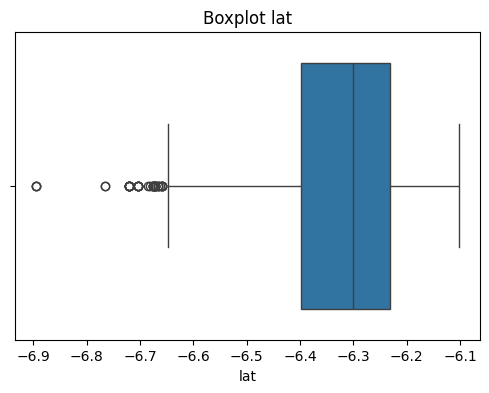

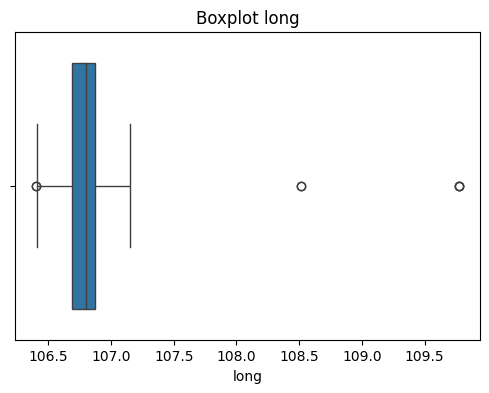

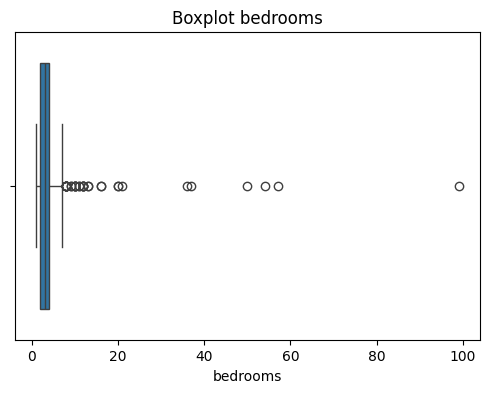

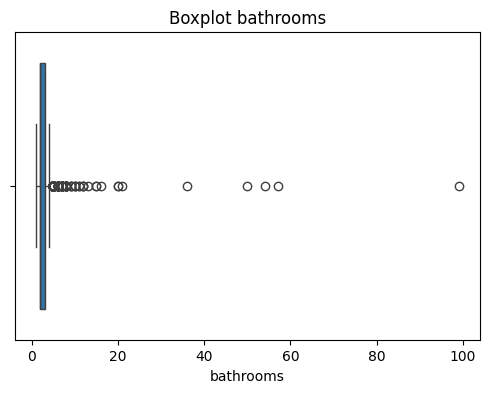

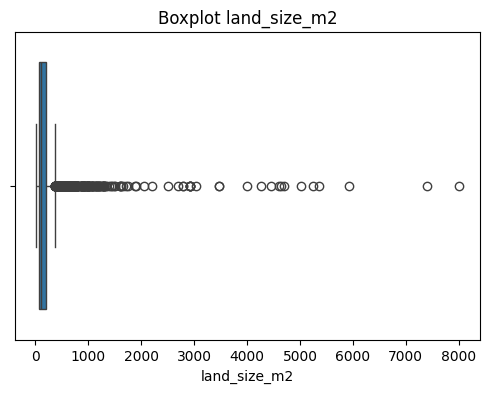

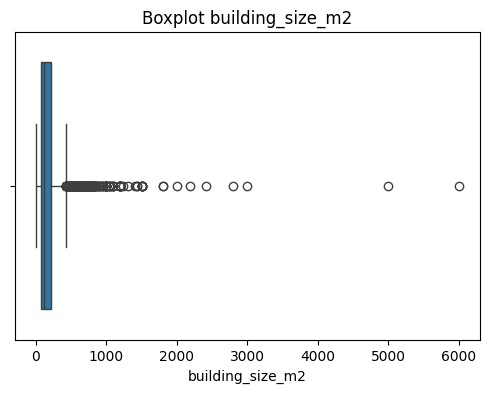

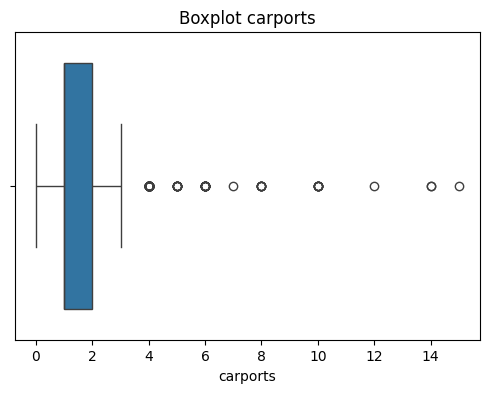

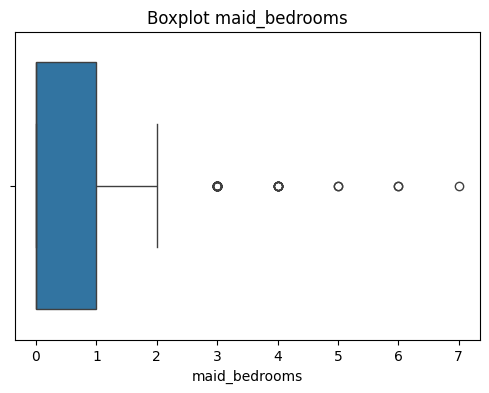

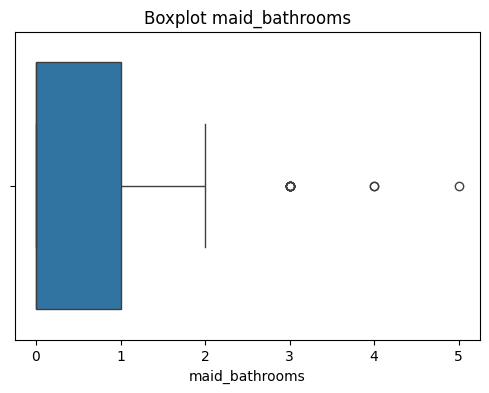

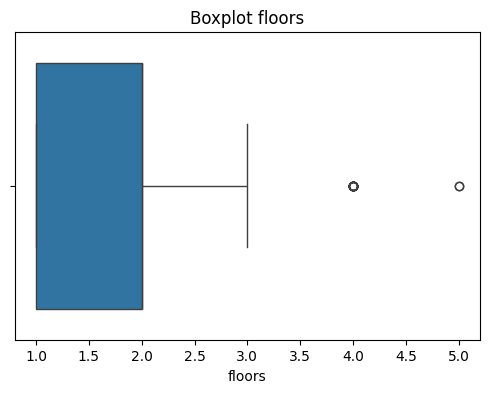

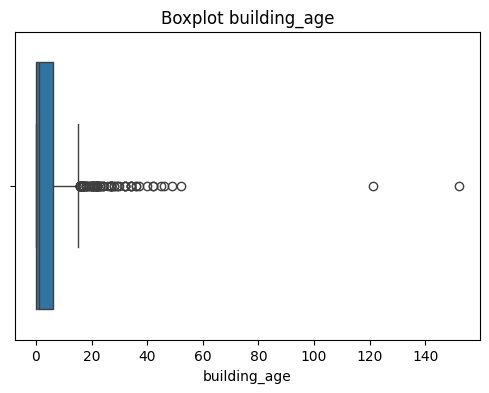

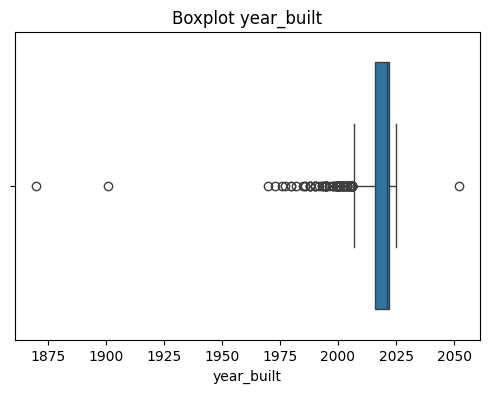

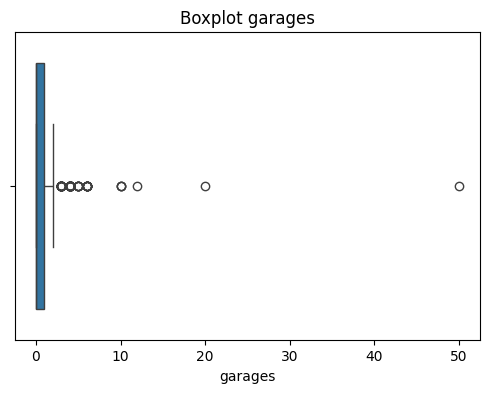

In [9]:
# Boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')
    plt.show()

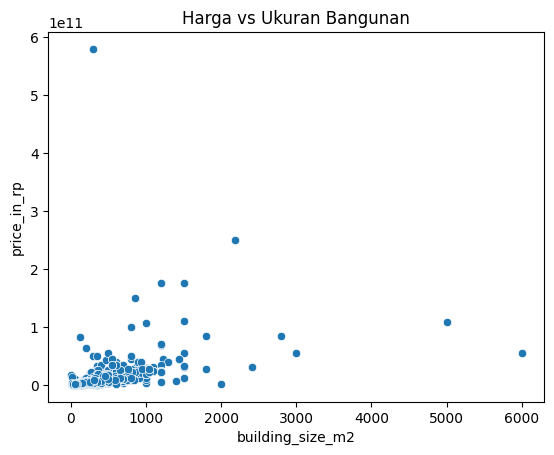

In [10]:
# Scatter plot: harga vs ukuran bangunan
sns.scatterplot(data=data, x='building_size_m2', y='price_in_rp')
plt.title('Harga vs Ukuran Bangunan')
plt.show()

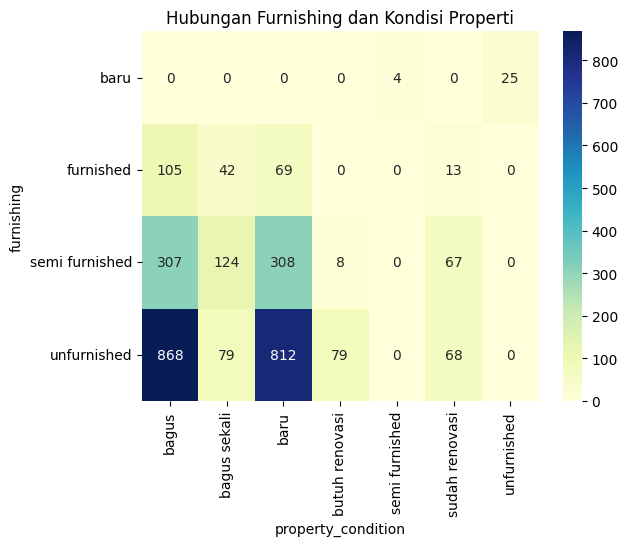

In [11]:
# Crosstab antar dua kategori
ct = pd.crosstab(data['furnishing'], data['property_condition'])
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Hubungan Furnishing dan Kondisi Properti')
plt.show()


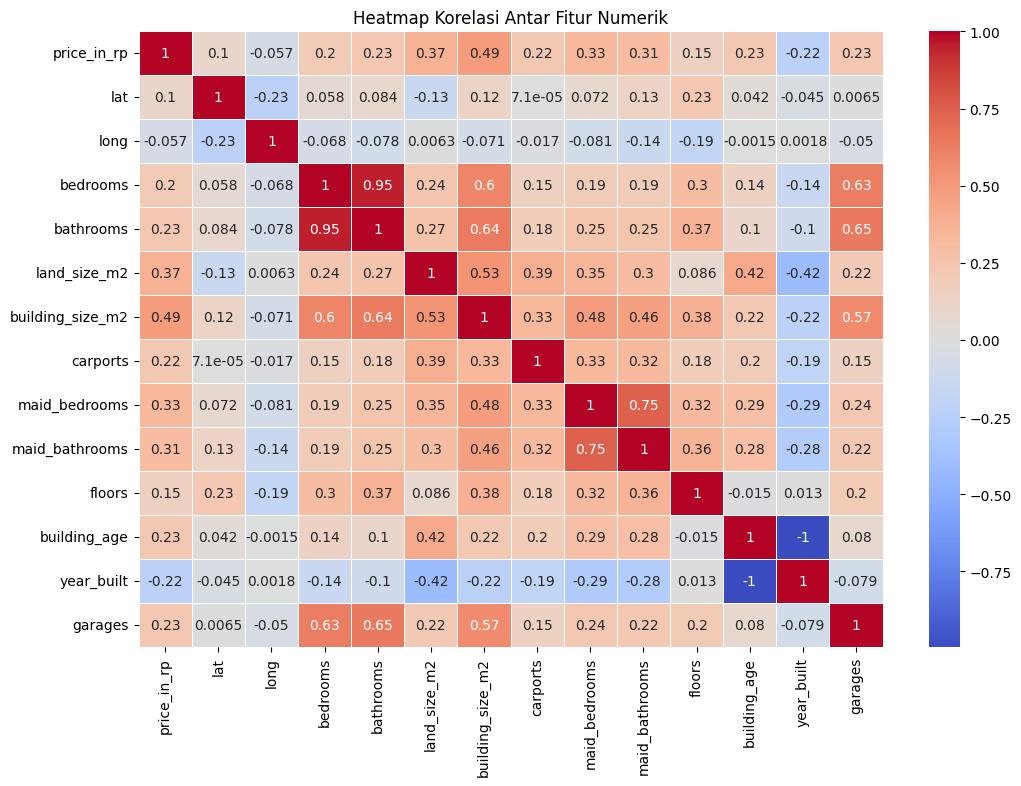

In [12]:
# Ambil hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Buat korelasi
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


Saya memilih **kolom-kolom numerik** dalam dataset menggunakan `select_dtypes`, kemudian menghitung **matriks korelasi** dengan `corr()`. Hasil korelasi ini saya visualisasikan dalam bentuk **heatmap** menggunakan **Seaborn** agar dapat melihat dengan jelas **hubungan linear** antar fitur numerik. Heatmap ini membantu saya **mengidentifikasi fitur-fitur yang memiliki hubungan kuat** (positif atau negatif), yang berguna untuk **pemilihan fitur**, **deteksi multikolinearitas**, atau **pemahaman pola data** sebelum membangun model.


## Preprocessing Data

In [13]:
data_original = data.copy()

# Hitung jumlah null per kolom
null_counts = data.isnull().sum()

# Drop kolom yang jumlah null-nya lebih dari 50
cols_to_drop = null_counts[null_counts > 50].index
data_cleaned = data_original.drop(columns=cols_to_drop)

# Isi sisa kolom numerik yang null dengan median
for col in data_cleaned.columns:
    if data_cleaned[col].isnull().sum() > 0:
        if data_cleaned[col].dtype in ['float64', 'int64']:
            median_val = data_cleaned[col].median()
            data_cleaned[col] = data_cleaned[col].fillna(median_val)
        else:  # untuk tipe object
            mode_val = data_cleaned[col].mode()[0]
            data_cleaned[col] = data_cleaned[col].fillna(mode_val)


data_cleaned.isnull().sum()

url                 0
price_in_rp         0
title               0
address             0
district            0
city                0
lat                 0
long                0
facilities          0
property_type       0
ads_id              0
bedrooms            0
bathrooms           0
land_size_m2        0
building_size_m2    0
carports            0
electricity         0
maid_bedrooms       0
maid_bathrooms      0
floors              0
garages             0
dtype: int64


Masuk ke dalam tahap pre processing data.Pertama saya melakukan proses **cleaning data** untuk menangani nilai yang hilang (**missing values**) dalam dataset. Pertama, saya **menghitung jumlah nilai null di setiap kolom** menggunakan `isnull().sum()`, lalu **menghapus kolom-kolom** yang memiliki **lebih dari 50 nilai null**, karena kolom tersebut dianggap memiliki terlalu banyak data yang hilang sehingga berpotensi mengganggu analisis. Setelah itu, saya fokus pada kolom yang tersisa dan mengisi **nilai null pada kolom numerik** dengan **nilai median** dari masing-masing kolom, karena median lebih tahan terhadap outlier dibandingkan mean. Untuk kolom bertipe objek (kategorikal), saya mengganti nilai null dengan **nilai modus (frekuensi terbanyak)** agar tetap merepresentasikan kategori yang umum dalam data. Langkah ini memastikan tidak ada lagi nilai null dalam dataset, sehingga data menjadi **siap untuk dianalisis lebih lanjut** atau digunakan dalam **pelatihan model machine learning**.


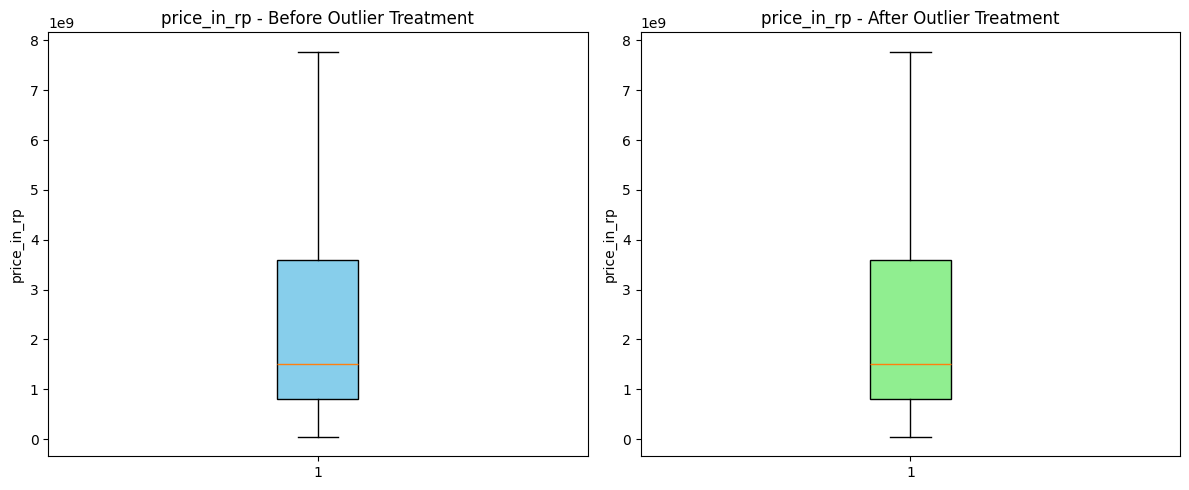

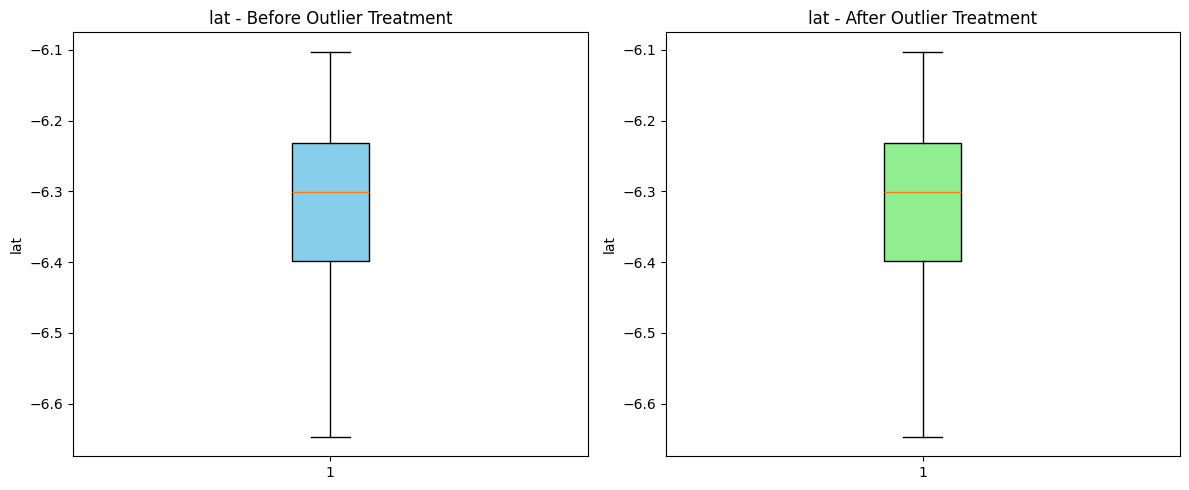

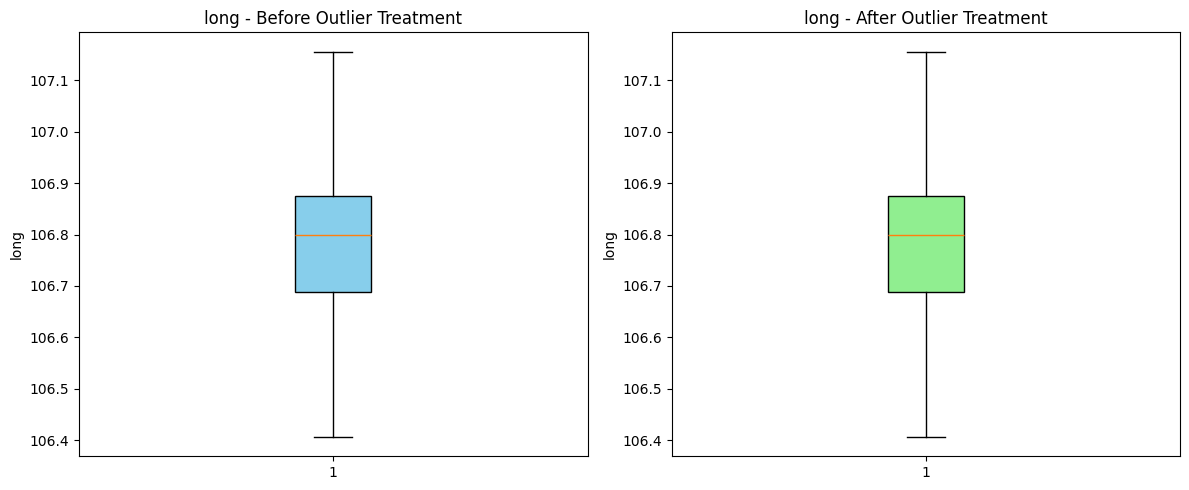

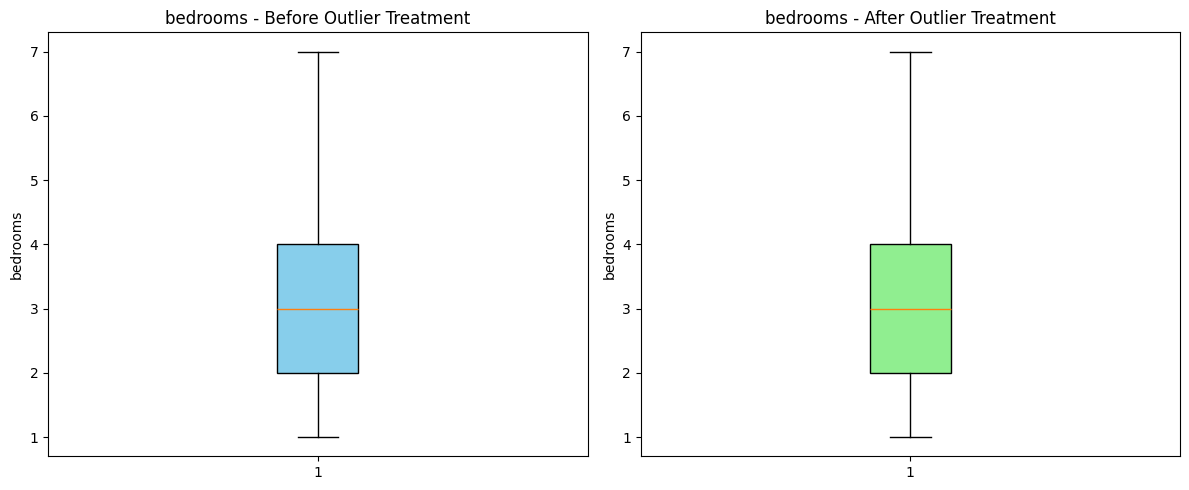

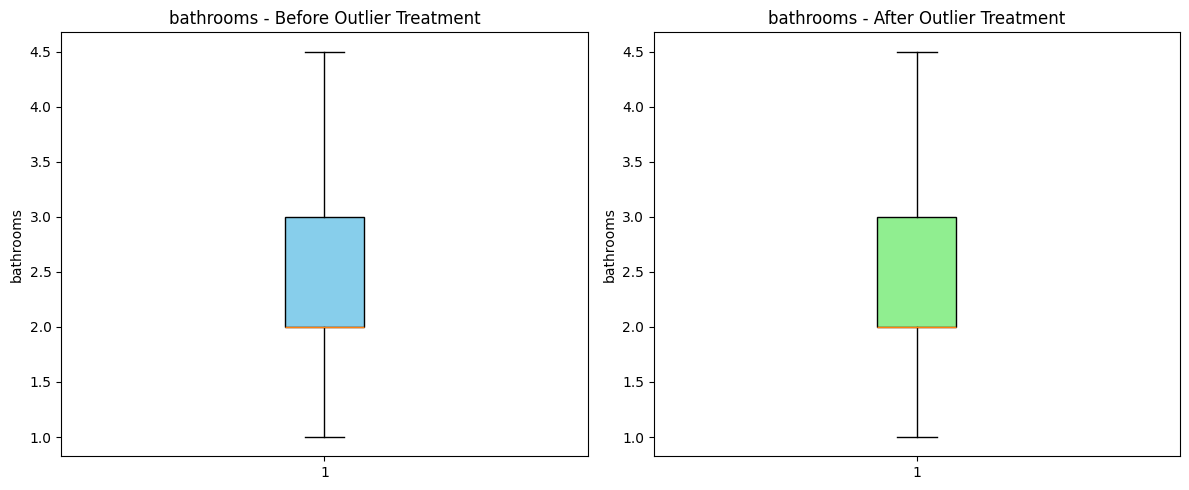

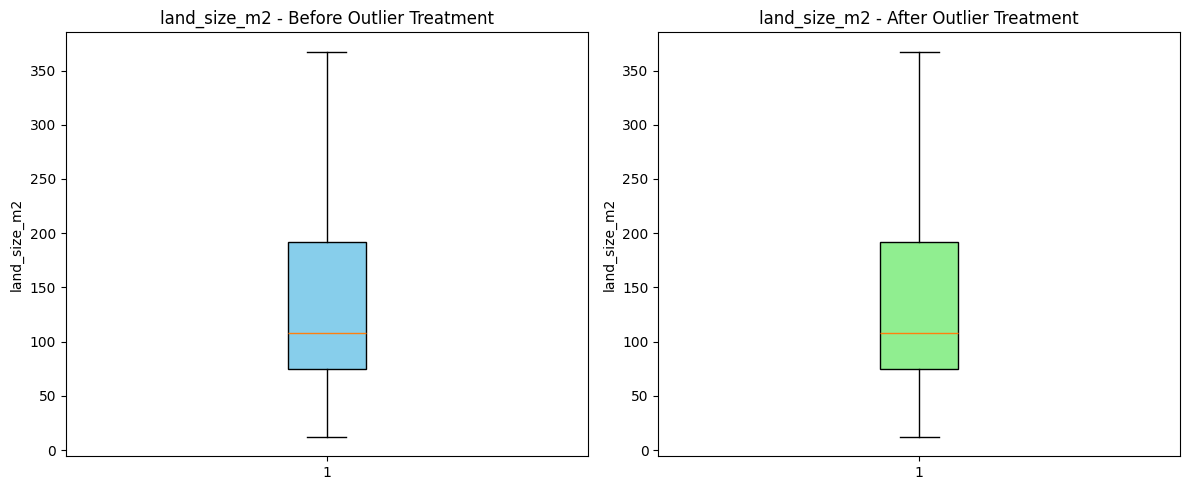

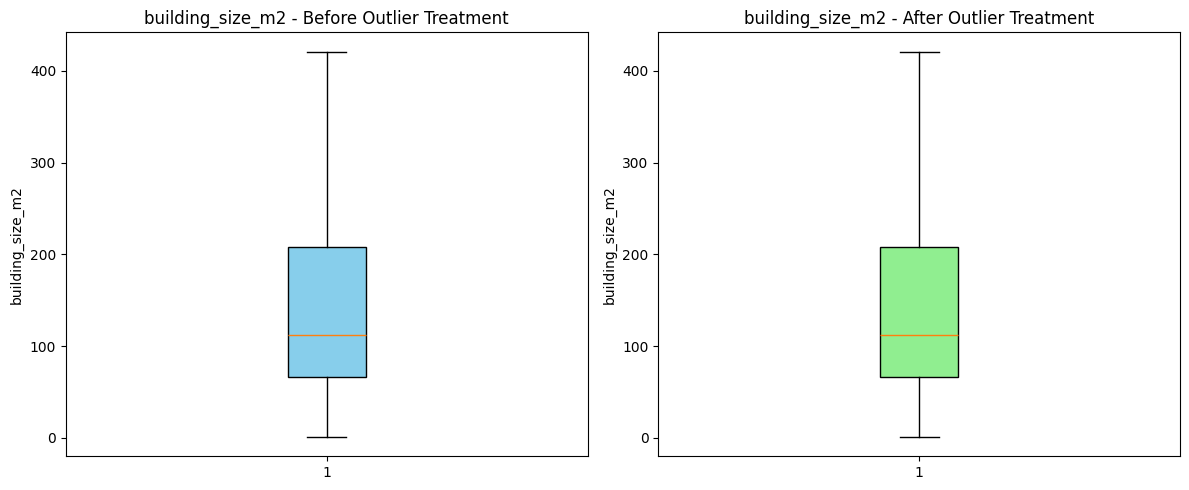

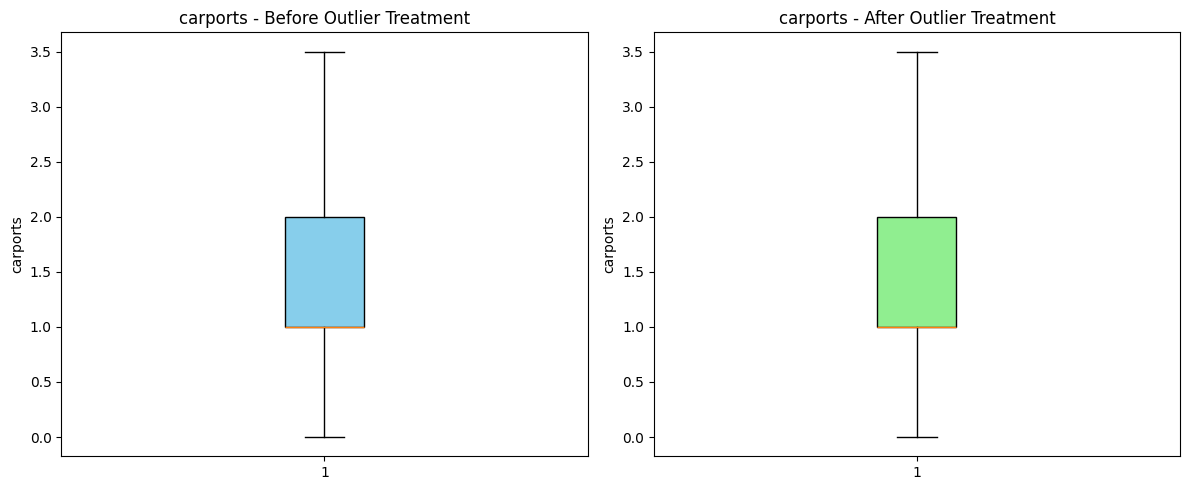

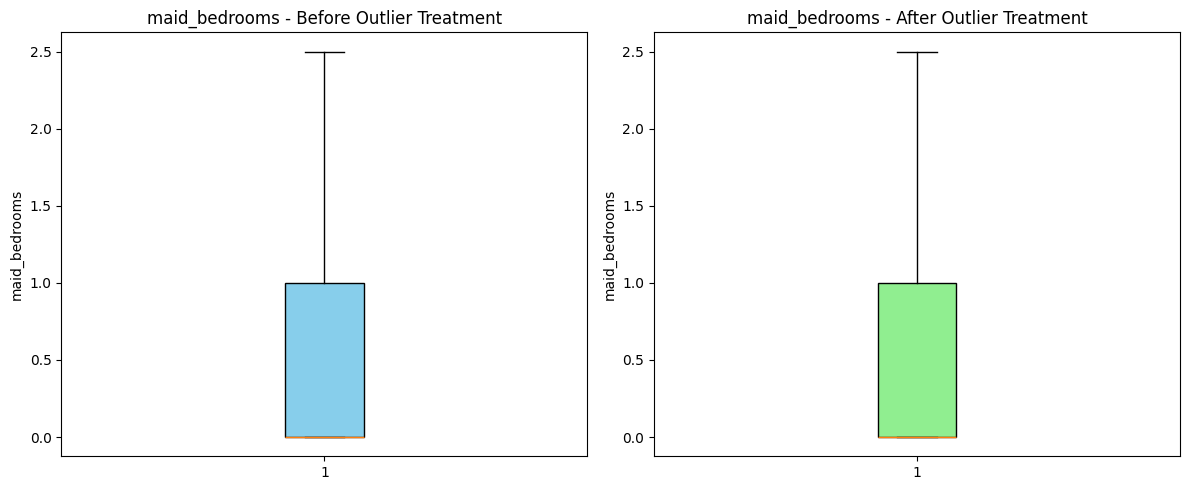

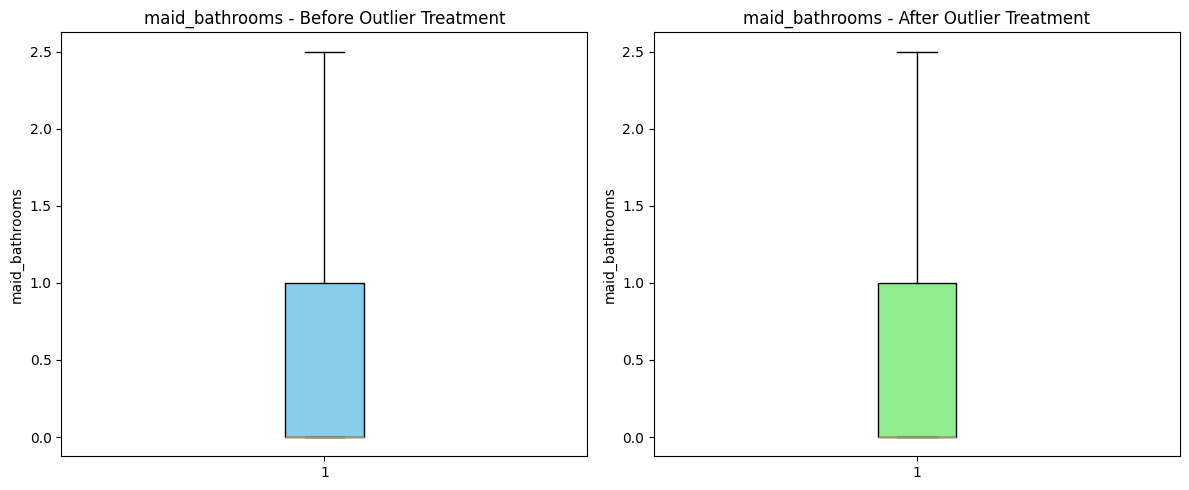

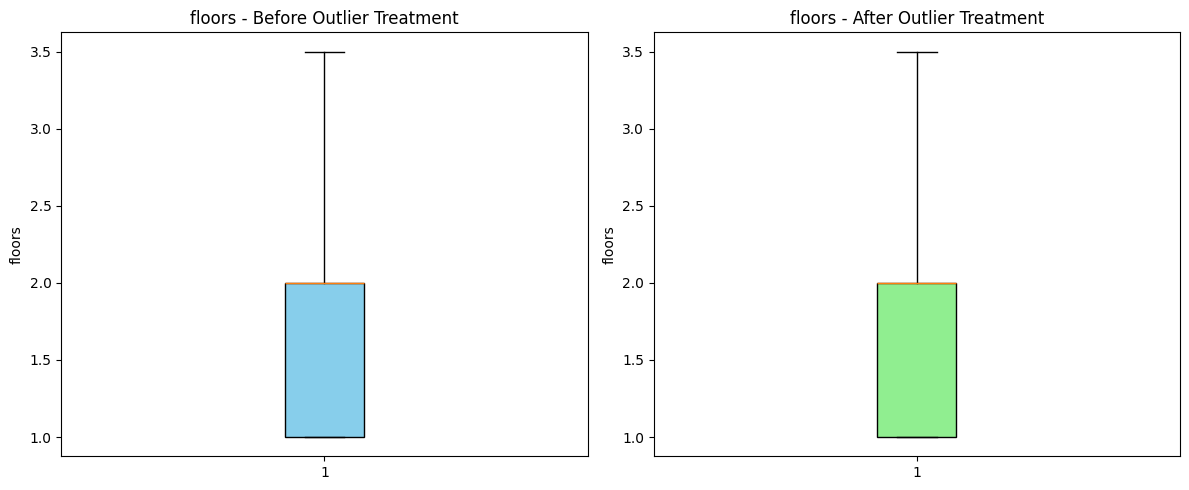

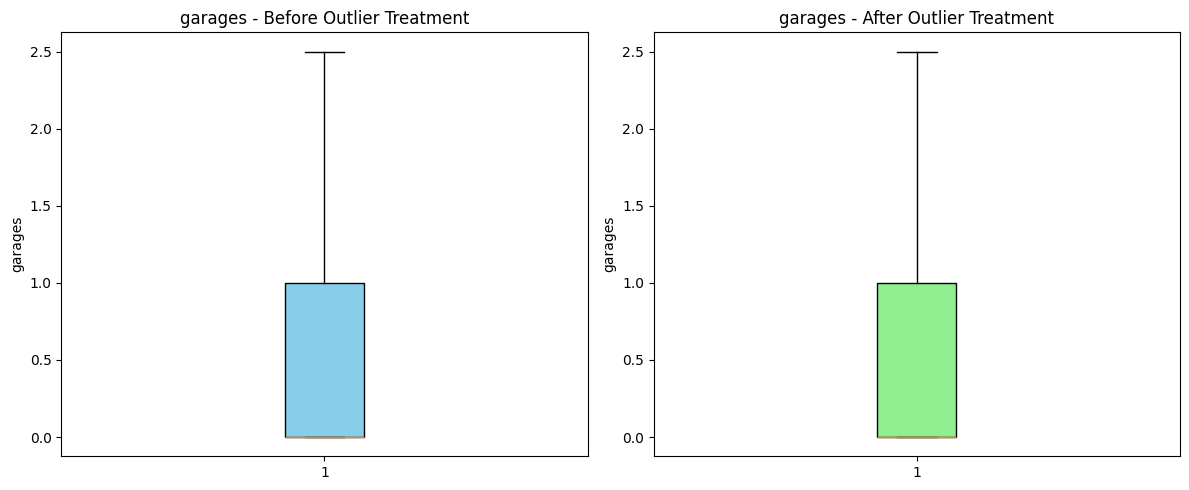

In [14]:
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns


for feature in numeric_cols:
    Q1 = data_cleaned[feature].quantile(0.25)
    Q3 = data_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization: batas atas dan bawah
    data_cleaned[feature] = np.where(data_cleaned[feature] < lower_bound, lower_bound, data_cleaned[feature])
    data_cleaned[feature] = np.where(data_cleaned[feature] > upper_bound, upper_bound, data_cleaned[feature])
    
    # Visualisasi boxplot sebelum dan sesudah
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.boxplot(data_cleaned[feature], patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"{feature} - Before Outlier Treatment")
    plt.ylabel(feature)

    plt.subplot(1, 2, 2)
    plt.boxplot(data_cleaned[feature], patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    plt.title(f"{feature} - After Outlier Treatment")
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()


Setelah membersihkan data dari nilai yang hilang, saya melakukan **penanganan outlier** pada fitur-fitur numerik dalam dataset. Pertama, saya memilih **semua kolom numerik** menggunakan `select_dtypes`. Untuk setiap fitur numerik, saya menghitung **interquartile range (IQR)**, yaitu selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1), untuk menentukan batas bawah dan batas atas outlier. Saya menerapkan teknik **winsorization**, yaitu mengganti nilai yang berada di bawah atau di atas batas tersebut dengan nilai batasnya, agar data tetap berada dalam rentang yang wajar tanpa menghapus informasi. Selain itu, saya membuat **visualisasi boxplot** untuk setiap fitur sebelum dan sesudah treatment outlier guna memantau perubahan distribusi nilai. Langkah ini penting untuk **mengurangi pengaruh nilai ekstrem** yang bisa mengganggu hasil analisis statistik atau kinerja model machine learning.


In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               3553 non-null   object 
 1   price_in_rp       3553 non-null   float64
 2   title             3553 non-null   object 
 3   address           3553 non-null   object 
 4   district          3553 non-null   object 
 5   city              3553 non-null   object 
 6   lat               3553 non-null   float64
 7   long              3553 non-null   float64
 8   facilities        3553 non-null   object 
 9   property_type     3553 non-null   object 
 10  ads_id            3553 non-null   object 
 11  bedrooms          3553 non-null   float64
 12  bathrooms         3553 non-null   float64
 13  land_size_m2      3553 non-null   float64
 14  building_size_m2  3553 non-null   float64
 15  carports          3553 non-null   float64
 16  electricity       3553 non-null   object 


Setelah melakukan pembersihan data dan treatment outlier, saya menjalankan `data_cleaned.info()` untuk **memeriksa struktur dataset**. Fungsi ini memberikan informasi penting seperti **jumlah total entri (baris)**, **jumlah kolom**, **nama kolom**, **jumlah non-null di setiap kolom**, serta **tipe data masing-masing kolom** (seperti `int64`, `float64`, atau `object`). Dari output ini, saya dapat memastikan bahwa **tidak ada nilai null yang tersisa** dan bahwa **tipe data sudah sesuai** untuk analisis lebih lanjut atau pelatihan model. Ini merupakan langkah validasi penting untuk memastikan dataset dalam kondisi siap digunakan.

In [16]:
data_cleaned = data_cleaned.drop(['url', 'title', 'ads_id','address','facilities','lat','long'], axis=1)

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3553 non-null   float64
 1   district          3553 non-null   object 
 2   city              3553 non-null   object 
 3   property_type     3553 non-null   object 
 4   bedrooms          3553 non-null   float64
 5   bathrooms         3553 non-null   float64
 6   land_size_m2      3553 non-null   float64
 7   building_size_m2  3553 non-null   float64
 8   carports          3553 non-null   float64
 9   electricity       3553 non-null   object 
 10  maid_bedrooms     3553 non-null   float64
 11  maid_bathrooms    3553 non-null   float64
 12  floors            3553 non-null   float64
 13  garages           3553 non-null   float64
dtypes: float64(10), object(4)
memory usage: 388.7+ KB


Saya menghapus beberapa kolom yang dianggap **tidak relevan atau tidak memberikan kontribusi signifikan** terhadap analisis atau pemodelan, yaitu `'url'`, `'title'`, `'ads_id'`, `'address'`, `'facilities'`, `'lat'`, dan `'long'`. Kolom-kolom ini sebagian besar bersifat **identifikasi unik** atau berisi informasi yang tidak terstruktur dan sulit digunakan secara langsung dalam model prediktif. Setelah penghapusan kolom, saya memeriksa kembali struktur dataset dengan `data_cleaned.info()` untuk memastikan **jumlah kolom berkurang sesuai harapan** dan bahwa **tidak ada nilai null yang tersisa**. Dataset sekarang terdiri dari **3553 entri** dan **14 kolom**, dengan kombinasi fitur numerik dan kategorikal yang siap digunakan untuk **eksplorasi data, feature engineering, atau pelatihan model**.


In [17]:
# Pilih semua kolom bertipe object
object_cols = data_cleaned.select_dtypes(include='object').columns

# Tampilkan nilai unik tiap kolom object
for col in object_cols:
    print(f"--- {col} ---")
    print(data_cleaned[col].unique())
    print("\n")


--- district ---
['Summarecon Bekasi' 'Bekasi' 'Setu' 'Harapan Indah' 'Bekasi Kota'
 'Cibitung' 'Cibubur' 'Mustikajaya' 'Jatisampurna' 'Jatiwarna'
 'Pondok Gede' 'Jaka Setia' 'Jati Asih' 'Grand Wisata' 'Jatibening'
 'Bekasi Utara' 'Rawalumbu' 'Tambun Selatan' 'Harapan Baru' 'Pondokmelati'
 'Babelan' 'Kemang Pratama' 'Jatiraden' 'Bekasi Timur' 'Jatiwaringin'
 'Tarumajaya' 'Cikarang Selatan' 'Kebalen' 'Kayuringin Jaya' 'Bintara'
 'Jatirangga' 'Cikarang' 'Jati Mekar' 'Duta Harapan' 'Jati Sari' 'Pejuang'
 'Galaxy' 'Tanah Tinggi' 'Jaka Sampurna' 'Bekasi Barat' 'Tambun Utara'
 'Kaliabang' 'Mustikasari' 'Cimuning' 'Caman' 'Cikunir' 'Satriajaya'
 'Pondok Ungu' 'Pekayon' 'Harapan Mulya' 'Harapan Jaya' 'Perwira'
 'Jatikramat' 'Jatimurni' 'Jatimelati' 'Karang Satria' 'Kranji'
 'Margahayu' 'Serang Baru' 'Duren Jaya' 'Jati Luhur' 'Jababeka' 'Komsen'
 'Jatiranggon' 'Narogong' 'Bantar Gebang' 'Jatimakmur' 'Jati Cempaka'
 'Golden City' 'Pedurenan' 'Medan Satria' 'Pasirmulya' 'Cilendek Timur'
 'Sentul 

Saya melakukan **identifikasi terhadap fitur-fitur kategorikal** dalam dataset dengan memilih kolom yang bertipe `object` menggunakan `select_dtypes`. Kemudian, saya mencetak semua **nilai unik dari masing-masing kolom kategorikal** untuk memahami variasi data yang ada.

1. **Kolom `district`** memiliki ratusan nilai unik yang menunjukkan nama-nama distrik atau wilayah. Ini menunjukkan bahwa kolom ini **sangat granular dan berpotensi memiliki high cardinality**, sehingga perlu dipertimbangkan apakah akan digunakan secara langsung atau diolah lebih lanjut (misalnya, dengan pengelompokan atau encoding berbasis frekuensi).

2. **Kolom `city`** berisi 9 nilai unik yang merepresentasikan kota-kota di Jabodetabek. Perlu dilakukan **pembersihan whitespace** di awal string (misalnya `' Bekasi'` menjadi `'Bekasi'`), sebelum digunakan dalam analisis atau encoding.

3. **Kolom `property_type`** hanya berisi satu nilai unik yaitu `'rumah'`. Karena tidak memiliki variasi, fitur ini **tidak informatif** untuk model dan sebaiknya dihapus.

4. **Kolom `electricity`** berisi nilai daya listrik dalam format teks seperti `'2200 mah'`, `'5500 mah'`, dll. Nilai-nilai ini perlu diubah menjadi **angka numerik** dengan menghapus string `' mah'` dan mengonversinya ke tipe integer agar bisa digunakan dalam analisis dan pemodelan.


In [18]:
data_cleaned['city'] = data_cleaned['city'].str.strip()

Saya membersihkan kolom `'city'` dari karakter whitespace menggunakan `str.strip()`. Hal ini dilakukan untuk **menghindari perbedaan nilai kategorikal yang disebabkan oleh spasi yang tidak terlihat**, seperti `'Bekasi'` dan `' Bekasi'`, yang sebenarnya merujuk pada entitas yang sama namun akan dianggap berbeda oleh Python. Pembersihan ini penting agar hasil analisis dan encoding menjadi **akurat dan konsisten**, terutama saat menghitung frekuensi atau melakukan transformasi kategorikal.

In [19]:
# Ekstrak angka saja
data_cleaned['electricity'] = data_cleaned['electricity'].str.extract('(\d+)').astype(float)
data_cleaned['electricity'] = data_cleaned['electricity'].fillna(data_cleaned['electricity'].median())

Saya membersihkan dan mengonversi kolom `'electricity'` dari format teks seperti `'2200 mah'` menjadi **nilai numerik** agar dapat digunakan dalam analisis dan pemodelan. Pertama, saya mengekstrak **hanya bagian angka** menggunakan ekspresi reguler `str.extract('(\d+)')`, kemudian mengonversinya ke tipe `float`. Setelah itu, saya mengisi nilai yang kosong (jika ada) dengan **nilai median** dari kolom tersebut untuk menjaga konsistensi dan menghindari missing values. Langkah ini memastikan bahwa fitur daya listrik dapat **diproses secara kuantitatif** dalam pipeline machine learning selanjutnya.

In [20]:
# OHE untuk property_type
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' biar hindari dummy trap
property_type_encoded = ohe.fit_transform(data[['property_type']])

# Nama kolom baru
property_type_cols = ohe.get_feature_names_out(['property_type'])

# Gabungkan ke dataframe
property_type_df = pd.DataFrame(property_type_encoded, columns=property_type_cols)

# Gabung ke data utama
data_cleaned = pd.concat([data_cleaned.drop('property_type', axis=1), property_type_df], axis=1)

Saya melakukan **One-Hot Encoding (OHE)** pada fitur kategorikal `'property_type'` untuk mengubahnya menjadi representasi numerik yang dapat digunakan oleh algoritma machine learning. Dengan menggunakan `OneHotEncoder` dari Scikit-learn, saya menetapkan `drop='first'` untuk **menghindari masalah multikolinearitas** atau yang dikenal sebagai **dummy variable trap**. Meskipun kolom `'property_type'` sebelumnya hanya memiliki satu nilai unik ('rumah'), langkah ini dilakukan sebagai bagian dari proses encoding standar. Setelah encoding, saya membuat **DataFrame baru berisi hasil encoding**, kemudian menggabungkannya kembali ke `data_cleaned` dan menghapus kolom aslinya. Meskipun tidak menambah informasi baru dalam kasus ini, proses ini memastikan bahwa pipeline tetap konsisten jika fitur serupa ada di dataset lain.

In [21]:
le_district = LabelEncoder()
le_city = LabelEncoder()

data_cleaned['district'] = le_district.fit_transform(data_cleaned['district'])
data_cleaned['city'] = le_city.fit_transform(data_cleaned['city'])

Saya melakukan **Label Encoding** pada fitur kategorikal `'district'` dan `'city'` untuk mengubah nilai-nilai kategorikal menjadi format numerik yang dapat dikenali oleh algoritma machine learning. Dengan menggunakan `LabelEncoder` dari Scikit-learn, setiap kategori unik di kedua kolom tersebut dikonversi menjadi angka bulat (integer) berdasarkan urutan kemunculannya. Langkah ini cocok digunakan jika fitur bersifat ordinal atau ketika model yang digunakan dapat menangani nilai numerik tanpa mengasumsikan adanya hubungan kuantitatif antar kategori. Encoding ini dilakukan secara langsung pada kolom-kolom asli di `data_cleaned`.

In [22]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_in_rp        3553 non-null   float64
 1   district           3553 non-null   int32  
 2   city               3553 non-null   int32  
 3   bedrooms           3553 non-null   float64
 4   bathrooms          3553 non-null   float64
 5   land_size_m2       3553 non-null   float64
 6   building_size_m2   3553 non-null   float64
 7   carports           3553 non-null   float64
 8   electricity        3553 non-null   float64
 9   maid_bedrooms      3553 non-null   float64
 10  maid_bathrooms     3553 non-null   float64
 11  floors             3553 non-null   float64
 12  garages            3553 non-null   float64
 13  property_type_nan  3553 non-null   float64
dtypes: float64(12), int32(2)
memory usage: 361.0 KB


Saya menjalankan perintah `data_cleaned.info()` untuk **mengecek apakah tipe data pada kolom `'kategorikal'` sudah berubah menjadi numerik** setelah dilakukan Encoding. Selain itu, saya juga memastikan bahwa tidak ada nilai yang hilang (missing values) dan semua kolom telah memiliki tipe data yang sesuai untuk digunakan dalam pemodelan machine learning. Pemeriksaan ini penting untuk memastikan bahwa proses praproses data berjalan dengan benar dan data siap digunakan pada tahap selanjutnya.


## Split Data

In [23]:
X = data_cleaned.drop('price_in_rp', axis=1)
y = data_cleaned['price_in_rp']

Saya memisahkan fitur (variabel independen) dan target (variabel dependen) dari dataset `data_cleaned` untuk keperluan pelatihan model machine learning. Dengan menggunakan `drop('price_in_rp', axis=1)`, saya menyimpan semua kolom kecuali `'price_in_rp'` ke dalam variabel `X` sebagai fitur. Sementara itu, kolom `'price_in_rp'` yang merupakan nilai yang ingin diprediksi (harga properti dalam rupiah) disimpan ke dalam variabel `y` sebagai target. Langkah ini penting untuk membedakan antara input dan output dalam proses pelatihan model.


In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Saya melakukan **pemisahan data** menjadi data latih dan data uji menggunakan fungsi `train_test_split` dari Scikit-learn. Saya menetapkan `test_size=0.2`, yang berarti **20% dari data digunakan sebagai data uji** dan sisanya (80%) digunakan untuk melatih model. Parameter `random_state=42` digunakan untuk **menjamin reproduktifitas**, sehingga hasil pemisahan data akan selalu sama setiap kali kode dijalankan. Pemisahan ini penting untuk mengevaluasi performa model secara objektif terhadap data yang belum pernah dilihat sebelumnya.


In [25]:
x_scaler = RobustScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_scaler = RobustScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

Saya melakukan **normalisasi data** menggunakan `RobustScaler` dari Scikit-learn untuk mengurangi pengaruh outlier dalam proses pelatihan model. Pertama, saya menerapkan scaler pada fitur `X_train` dan `X_test`, menghasilkan `X_train_scaled` dan `X_test_scaled`, agar data fitur berada dalam skala yang sebanding. Kemudian, saya juga melakukan scaling pada target variabel `y_train` dan `y_test`, yang terlebih dahulu diubah bentuknya menjadi array 2 dimensi menggunakan `.reshape(-1, 1)`. Penggunaan `RobustScaler` sangat berguna karena scaler ini memanfaatkan **median dan IQR**, sehingga lebih tahan terhadap outlier dibanding scaler lainnya seperti `StandardScaler`.


## Modeling Data

In [26]:
# 1. Inisialisasi model
model = LinearRegression()

# 2. Latih model dengan data training
model.fit(X_train_scaled, y_train_scaled)

# 3. Prediksi pada data test
y_pred_lr = model.predict(X_test_scaled)


Setelah pemisahan data tadi saya melakukan **pelatihan model regresi linear** menggunakan algoritma `LinearRegression` dari Scikit-learn. Pertama, saya menginisialisasi model regresi linear dan menyimpannya dalam variabel `model`. Selanjutnya, saya melatih model tersebut dengan data yang telah diskalakan, yaitu `X_train_scaled` sebagai fitur dan `y_train_scaled` sebagai target. Setelah model selesai dilatih, saya menggunakannya untuk **melakukan prediksi pada data uji** (`X_test_scaled`) dan menyimpan hasil prediksi dalam variabel `y_pred_lr`. Proses ini merupakan tahap awal evaluasi kinerja model terhadap data yang belum pernah dilihat sebelumnya.


In [27]:
# 1. Model dasar
mlp = MLPRegressor(random_state=42, early_stopping=True)

# 2. Ruang hyperparameter
param_dist = {
    'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64), (128, 128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': uniform(1e-5, 1e-3),  # L2 regularization strength
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000]
}

# 3. Randomized Search
random_search_mlp = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                    n_iter=20, cv=3, scoring='r2',
                                    random_state=42, verbose=2, n_jobs=-1)

random_search_mlp.fit(X_train_scaled, y_train_scaled)

# 4. Evaluasi model terbaik
best_model = random_search_mlp.best_estimator_

y_pred_mlp = best_model.predict(X_test_scaled)
best_params = random_search_mlp.best_params_
print("\n=== Best Params dari RandomizedSearch ===")
print(best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== Best Params dari RandomizedSearch ===
{'activation': 'tanh', 'alpha': 0.0009588855372533333, 'hidden_layer_sizes': (256, 128, 64), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


Selanjutnya saya membangun dan menyetel model **Multilayer Perceptron (MLP)** menggunakan `MLPRegressor` dari Scikit-learn untuk melakukan prediksi regresi. Pertama, saya menginisialisasi model dasar `mlp` dengan `random_state=42` untuk memastikan hasil yang konsisten, serta `early_stopping=True` agar pelatihan dapat berhenti lebih awal jika performa validasi tidak membaik. Kemudian, saya mendefinisikan **ruang hyperparameter** (`param_dist`) yang mencakup ukuran lapisan tersembunyi, fungsi aktivasi, algoritma optimasi, kekuatan regularisasi (`alpha`), strategi learning rate, dan jumlah iterasi maksimum.

Untuk menemukan kombinasi hyperparameter terbaik, saya menggunakan **RandomizedSearchCV** dengan 20 iterasi (`n_iter=20`), validasi silang 3-fold (`cv=3`), dan skor evaluasi `'r2'`. Setelah proses pencarian selesai, saya mengambil model terbaik (`best_estimator_`) dan menggunakannya untuk memprediksi data uji (`X_test_scaled`). Terakhir, saya mencetak **hyperparameter terbaik** yang ditemukan selama pencarian. Proses ini bertujuan untuk meningkatkan performa model melalui optimasi hyperparameter yang efisien.

In [28]:
# === 3. Model 2: XGB Tuned (RandomizedSearchCV) ===
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_scaled, y_train_scaled)
best_params = random_search_xgb.best_params_
print("\n=== Best Params dari RandomizedSearch ===")
print(best_params)

# Gunakan best_params untuk buat ulang model
xgb_tuned = XGBRegressor(**best_params, random_state=42)
xgb_tuned.fit(X_train_scaled, y_train_scaled)
y_pred_tuned_xgb = xgb_tuned.predict(X_test_scaled)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

=== Best Params dari RandomizedSearch ===
{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


Terakhir saya membangun dan menyetel model **XGBoost Regressor** menggunakan `RandomizedSearchCV` untuk mengoptimalkan performanya. Pertama, saya mendefinisikan **ruang pencarian hyperparameter** (`param_grid`) yang mencakup jumlah pohon (`n_estimators`), kedalaman maksimum pohon (`max_depth`), laju pembelajaran (`learning_rate`), serta parameter sampling (`subsample` dan `colsample_bytree`) yang mempengaruhi regularisasi dan generalisasi model.

Saya menggunakan `RandomizedSearchCV` untuk mencoba 20 kombinasi hyperparameter (`n_iter=20`) dengan validasi silang 3-fold (`cv=3`) dan menggunakan skor **R²** sebagai metrik evaluasi. Setelah menemukan kombinasi terbaik, saya mencetak **best parameters** yang diperoleh dan menggunakannya untuk membangun ulang model `XGBRegressor` dengan konfigurasi tersebut. Model yang telah dituning kemudian dilatih kembali menggunakan data training dan digunakan untuk melakukan prediksi terhadap data uji. Proses ini bertujuan untuk mendapatkan model XGBoost dengan performa optimal melalui penyetelan hyperparameter yang efisien.


## Evaluasi Model

In [29]:
def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
    print(f"R² Score: {r2:.4f}")

Untuk melihat evaluasi terkait model yang saya buat. Saya mendefinisikan fungsi `regression_report` untuk **mengevaluasi performa model regresi** berdasarkan lima metrik umum:

1. **Mean Squared Error (MSE)** — mengukur rata-rata kuadrat selisih antara nilai aktual dan prediksi.
2. **Root Mean Squared Error (RMSE)** — akar dari MSE yang mengembalikan nilai dalam satuan asli target, sehingga lebih mudah diinterpretasikan.
3. **Mean Absolute Error (MAE)** — rata-rata dari nilai absolut selisih antara prediksi dan nilai sebenarnya.
4. **Mean Absolute Percentage Error (MAPE)** — kesalahan absolut dalam bentuk persentase relatif terhadap nilai aktual.
5. **R² Score** — mengukur seberapa baik model menjelaskan variabilitas data, dengan nilai mendekati 1 menunjukkan performa yang baik.



Regression Report Linear Regression
----------------------------
Mean Squared Error (MSE): 0.1000
Root Mean Squared Error (RMSE): 0.3162
Mean Absolute Error (MAE): 0.2190
Mean Absolute Percentage Error (MAPE): 11765339914528.8770
R² Score: 0.8646


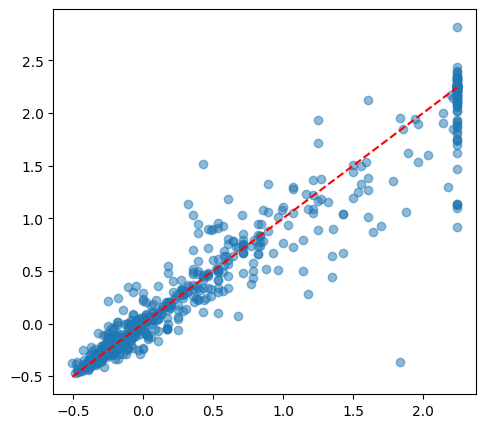

In [30]:
# === 4. Visualisasi Perbandingan ===
plt.figure(figsize=(12,5))

# Prediksi Tuned
plt.subplot(1,2,2)
plt.scatter(y_test_scaled, y_pred_tuned_xgb, alpha=0.5)
plt.plot([y_test_scaled.min(), y_test_scaled.max()],
         [y_test_scaled.min(), y_test_scaled.max()],
         'r--')

print("Regression Report Linear Regression")
print("----------------------------")
regression_report(y_test_scaled, y_pred_lr)

Setelah seluruh model selesai dilatih dan diuji, saya melakukan **visualisasi perbandingan hasil prediksi model XGBoost yang telah dituning**. Visualisasi ini dibuat menggunakan scatter plot, dengan sumbu x merepresentasikan nilai sebenarnya (`y_test_scaled`) dan sumbu y menunjukkan hasil prediksi (`y_pred_tuned_xgb`). Sebuah garis merah putus-putus ditambahkan sebagai referensi ideal di mana nilai prediksi sama persis dengan nilai aktual. Plot ini membantu dalam menilai seberapa dekat prediksi model terhadap nilai sesungguhnya. Selain visualisasi, saya juga mencetak **laporan evaluasi regresi dari model Linear Regression** yang mencakup berbagai metrik seperti MSE, RMSE, MAE, MAPE, dan skor R². Hasil evaluasi menunjukkan bahwa model Linear Regression memiliki performa yang cukup baik dengan nilai R² sebesar 0.8646, meskipun nilai MAPE sangat besar kemungkinan karena adanya nilai mendekati nol dalam target yang menyebabkan pembagi kecil pada perhitungan persentase kesalahan. Evaluasi ini memberikan gambaran awal untuk membandingkan performa antar model yang telah dibangun.

Regression Report Multiple Layer Perceptron Regressor
----------------------------
Mean Squared Error (MSE): 0.0722
Root Mean Squared Error (RMSE): 0.2688
Mean Absolute Error (MAE): 0.1721
Mean Absolute Percentage Error (MAPE): 7085187772514.8477
R² Score: 0.9022


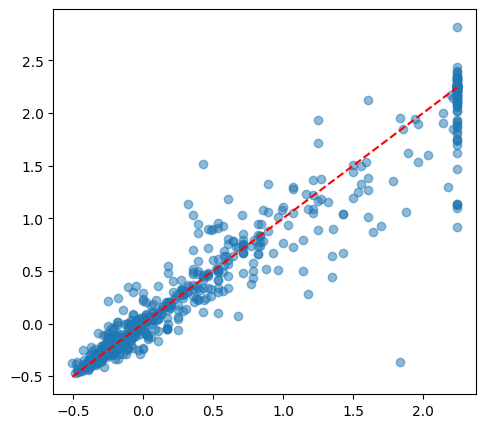

In [31]:
# === 4. Visualisasi Perbandingan ===
plt.figure(figsize=(12,5))

# Prediksi Tuned
plt.subplot(1,2,2)
plt.scatter(y_test_scaled, y_pred_tuned_xgb, alpha=0.5)
plt.plot([y_test_scaled.min(), y_test_scaled.max()],
         [y_test_scaled.min(), y_test_scaled.max()],
         'r--')

print("Regression Report Multiple Layer Perceptron Regressor")
print("----------------------------")
regression_report(y_test_scaled, y_pred_mlp)

Setelah model XGBoost selesai divalidasi dan divisualisasikan, saya juga melakukan **visualisasi hasil prediksi dari model Multiple Layer Perceptron (MLP) Regressor** yang telah dituning. Plot ini memetakan hubungan antara nilai sebenarnya (`y_test_scaled`) dan hasil prediksi model (`y_pred_tuned_xgb`) dalam bentuk scatter plot, dilengkapi dengan garis merah putus-putus sebagai referensi prediksi ideal. Kemudian, saya mencetak **laporan evaluasi regresi untuk model MLP**, yang menunjukkan metrik performa seperti MSE, RMSE, MAE, MAPE, dan R². Hasilnya menunjukkan bahwa model MLP memiliki performa prediktif yang sangat baik dengan **R² sebesar 0.9022**, mengindikasikan bahwa model mampu menjelaskan sekitar 90% variansi data. Nilai error lainnya seperti RMSE dan MAE juga lebih rendah dibandingkan model Linear Regression, menunjukkan peningkatan akurasi. Namun, seperti pada model sebelumnya, **nilai MAPE sangat tinggi** akibat adanya nilai target mendekati nol, yang secara matematis memperbesar kesalahan persentase. Evaluasi ini menunjukkan bahwa MLP memiliki potensi sebagai model terbaik dalam tugas regresi ini.

Regression Report XGBoost Regressor
----------------------------
Mean Squared Error (MSE): 0.0507
Root Mean Squared Error (RMSE): 0.2252
Mean Absolute Error (MAE): 0.1152
Mean Absolute Percentage Error (MAPE): 8364099413408.6543
R² Score: 0.9313


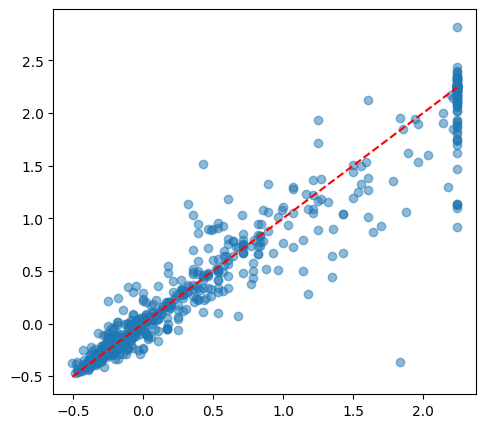

In [32]:
# === 4. Visualisasi Perbandingan ===
plt.figure(figsize=(12,5))

# Prediksi Tuned
plt.subplot(1,2,2)
plt.scatter(y_test_scaled, y_pred_tuned_xgb, alpha=0.5)
plt.plot([y_test_scaled.min(), y_test_scaled.max()],
         [y_test_scaled.min(), y_test_scaled.max()],
         'r--')

print("Regression Report XGBoost Regressor")
print("----------------------------")
regression_report(y_test_scaled, y_pred_tuned_xgb)

Setelah evaluasi model MLP, saya melanjutkan dengan **visualisasi hasil prediksi model XGBoost Regressor yang telah dituning**. Scatter plot ditampilkan dengan nilai aktual (`y_test_scaled`) pada sumbu x dan hasil prediksi (`y_pred_tuned_xgb`) pada sumbu y, serta sebuah garis diagonal merah putus-putus yang merepresentasikan prediksi sempurna. Visualisasi ini memudahkan analisis visual terhadap kualitas prediksi model. Kemudian, saya mencetak **laporan evaluasi regresi XGBoost**, yang menunjukkan hasil terbaik di antara semua model yang diuji. Dengan **R² sebesar 0.9313**, model ini mampu menjelaskan lebih dari 93% variansi dalam data target. Selain itu, nilai-nilai error seperti **MSE (0.0507), RMSE (0.2252), dan MAE (0.1152)** juga lebih rendah dibandingkan model lain, menunjukkan tingkat kesalahan prediksi yang sangat kecil. Meski **MAPE kembali sangat besar**, hal ini kemungkinan besar tetap disebabkan oleh pembagi nol atau nilai target sangat kecil dalam data uji. Secara keseluruhan, model XGBoost menunjukkan **performansi paling unggul**, menjadikannya kandidat utama untuk deployment.

In [33]:
def compare_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n=== {model_name} ===")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    return {'model': model_name, 'r2': r2, 'mse': mse, 'mae': mae}

results = []
results.append(compare_model(y_test_scaled, y_pred_lr, 'Linear Regression'))
results.append(compare_model(y_test_scaled, y_pred_mlp, 'MLP Regressor (Tuned)'))
results.append(compare_model(y_test_scaled, y_pred_tuned_xgb, 'XGBoost Regressor (Tuned)'))

results_sorted = sorted(results, key=lambda x: x['r2'], reverse=True)
best_model_name = results_sorted[0]['model']
print(f"\n✅ Model terbaik: {best_model_name}")


=== Linear Regression ===
R2 Score: 0.8646
MSE: 0.1000
MAE: 0.2190

=== MLP Regressor (Tuned) ===
R2 Score: 0.9022
MSE: 0.0722
MAE: 0.1721

=== XGBoost Regressor (Tuned) ===
R2 Score: 0.9313
MSE: 0.0507
MAE: 0.1152

✅ Model terbaik: XGBoost Regressor (Tuned)


Setelah seluruh model diuji dan dievaluasi, saya melakukan **perbandingan kinerja model menggunakan fungsi `compare_model`** yang menghitung tiga metrik utama: **R² Score, MSE, dan MAE**. Hasil evaluasi menunjukkan bahwa:

- **Linear Regression** memiliki R² sebesar 0.8646, dengan MSE dan MAE yang cukup besar (0.1000 dan 0.2190).
- **MLP Regressor (Tuned)** memberikan peningkatan performa, dengan R² sebesar 0.9022 dan penurunan signifikan pada MSE dan MAE.
- **XGBoost Regressor (Tuned)** tampil sebagai model terbaik, dengan **R² tertinggi (0.9313)** dan **kesalahan prediksi terendah** (MSE 0.0507 dan MAE 0.1152).

Model XGBoost yang telah dituning tidak hanya memberikan prediksi yang lebih akurat, tetapi juga menunjukkan kemampuan generalisasi yang lebih baik dibandingkan model lainnya. Berdasarkan hasil ini, **XGBoost Regressor (Tuned)** dipilih sebagai **model terbaik** untuk digunakan dalam tahap selanjutnya seperti deployment atau integrasi dengan sistem nyata.

## Saving Model

In [34]:
os.makedirs('../models', exist_ok=True)

if best_model_name == 'Linear Regression':
    best_model_final = model
elif best_model_name == 'MLP Regressor (Tuned)':
    best_model_final = best_model
elif best_model_name == 'XGBoost Regressor (Tuned)':
    best_model_final = xgb_tuned
else:
    raise ValueError("Model tidak dikenali")

# Simpan model
joblib.dump(best_model_final, '../models/best_regressor_model.pkl')

# Simpan scaler
joblib.dump(x_scaler, '../models/x_scaler.pkl')
joblib.dump(y_scaler, '../models/y_scaler.pkl')

# Simpan encoder
joblib.dump(ohe, '../models/property_type_ohe.pkl')
joblib.dump(le_district, '../models/le_district.pkl')
joblib.dump(le_city, '../models/le_city.pkl')

print("\nModel terbaik dan semua preprocessing object berhasil disimpan ✅")


Model terbaik dan semua preprocessing object berhasil disimpan ✅


Selanjutnya, setelah berhasil menentukan **model terbaik yaitu XGBoost Regressor yang telah dituning**, saya menyimpannya untuk keperluan **deployment atau penggunaan ulang di masa depan**. Pertama, saya memastikan direktori penyimpanan model (`../models`) tersedia dengan menggunakan `os.makedirs`. Kemudian, saya memilih objek model yang sesuai berdasarkan nama model terbaik yang telah ditentukan sebelumnya, dan menyimpannya dalam format `.pkl` menggunakan `joblib.dump`.

Selain model, saya juga menyimpan seluruh objek preprocessing yang diperlukan agar proses inferensi di masa depan tetap konsisten. Ini mencakup **scaler untuk fitur dan target** (`x_scaler`, `y_scaler`) serta **encoder untuk fitur kategorikal** (`ohe` untuk `property_type`, dan `LabelEncoder` untuk `district` dan `city`). Dengan menyimpan seluruh komponen ini, saya memastikan bahwa pipeline preprocessing dan prediksi dapat direkonstruksi kembali secara akurat kapan pun diperlukan.

Langkah ini sangat penting dalam workflow machine learning karena memungkinkan model yang telah dilatih untuk langsung digunakan di lingkungan produksi tanpa perlu retraining atau pengolahan ulang data dari awal.

## Inference Testing

In [35]:
# ==== Load model dan preprocessing ====
model = joblib.load('../models/best_regressor_model.pkl')
x_scaler = joblib.load('../models/x_scaler.pkl')
y_scaler = joblib.load('../models/y_scaler.pkl')
ohe = joblib.load('../models/property_type_ohe.pkl')
le_district = joblib.load('../models/le_district.pkl')
le_city = joblib.load('../models/le_city.pkl')


Setelah model terbaik dan seluruh objek preprocessing berhasil disimpan, saya melanjutkan ke tahap **inference testing** dengan memuat kembali model dan semua komponen preprocessing yang telah disimpan sebelumnya. Langkah pertama dalam proses ini adalah **melakukan load model dan preprocessing pipeline** menggunakan `joblib.load`. Saya memuat:

- `best_regressor_model.pkl` sebagai **model regresi terbaik**,
- `x_scaler.pkl` dan `y_scaler.pkl` sebagai **scaler untuk fitur dan target**,
- serta `property_type_ohe.pkl`, `le_district.pkl`, dan `le_city.pkl` sebagai **encoder untuk data kategorikal**.

Dengan memuat semua objek ini, saya memastikan bahwa data input untuk prediksi nantinya akan melalui proses transformasi yang **identik** dengan data saat pelatihan. Ini sangat penting agar model dapat melakukan inferensi secara akurat dan konsisten terhadap data baru. Selanjutnya, saya siap untuk memproses input data baru dan melakukan prediksi nilai target menggunakan model yang telah dilatih.

In [36]:
# === 10 contoh data baru (Jabodetabek) ===
new_data_list = [
    {
        'district': 'Kebayoran Baru',
        'city': 'Jakarta Selatan',
        'bedrooms': 4,
        'bathrooms': 3,
        'land_size_m2': 400,
        'building_size_m2': 350,
        'carports': 2,
        'electricity': 5500,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 2,
        'property_type': 'rumah'
    },
    {
        'district': 'Pondok Indah',
        'city': 'Jakarta Selatan',
        'bedrooms': 5,
        'bathrooms': 4,
        'land_size_m2': 600,
        'building_size_m2': 500,
        'carports': 3,
        'electricity': 7700,
        'maid_bedrooms': 2,
        'maid_bathrooms': 2,
        'floors': 2,
        'garages': 2,
        'property_type': 'rumah'
    },
    {
        'district': 'Harapan Indah',
        'city': 'Bekasi',
        'bedrooms': 3,
        'bathrooms': 2,
        'land_size_m2': 180,
        'building_size_m2': 140,
        'carports': 1,
        'electricity': 2200,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 1,
        'property_type': 'rumah'
    },
    {
        'district': 'BSD City',
        'city': 'Tangerang',
        'bedrooms': 3,
        'bathrooms': 2,
        'land_size_m2': 200,
        'building_size_m2': 160,
        'carports': 1,
        'electricity': 3500,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 1,
        'property_type': 'rumah'
    },
    {
        'district': 'Bintaro',
        'city': 'Tangerang',
        'bedrooms': 2,
        'bathrooms': 2,
        'land_size_m2': 150,
        'building_size_m2': 120,
        'carports': 1,
        'electricity': 2200,
        'maid_bedrooms': 0,
        'maid_bathrooms': 0,
        'floors': 1,
        'garages': 0,
        'property_type': 'rumah'
    },
    {
        'district': 'Citayam',
        'city': 'Depok',
        'bedrooms': 2,
        'bathrooms': 1,
        'land_size_m2': 120,
        'building_size_m2': 90,
        'carports': 1,
        'electricity': 2200,
        'maid_bedrooms': 0,
        'maid_bathrooms': 0,
        'floors': 1,
        'garages': 0,
        'property_type': 'rumah'
    },
    {
        'district': 'Cibubur',
        'city': 'Depok',
        'bedrooms': 3,
        'bathrooms': 2,
        'land_size_m2': 200,
        'building_size_m2': 160,
        'carports': 1,
        'electricity': 3500,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 1,
        'property_type': 'rumah'
    },
    {
        'district': 'Sunter',
        'city': 'Jakarta Utara',
        'bedrooms': 2,
        'bathrooms': 1,
        'land_size_m2': 100,
        'building_size_m2': 80,
        'carports': 1,
        'electricity': 2200,
        'maid_bedrooms': 0,
        'maid_bathrooms': 0,
        'floors': 1,
        'garages': 0,
        'property_type': 'rumah'
    },
    {
        'district': 'Cilandak',
        'city': 'Jakarta Selatan',
        'bedrooms': 4,
        'bathrooms': 3,
        'land_size_m2': 350,
        'building_size_m2': 300,
        'carports': 2,
        'electricity': 5500,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 2,
        'property_type': 'rumah'
    },
    {
        'district': 'Pondok Gede',
        'city': 'Bekasi',
        'bedrooms': 3,
        'bathrooms': 2,
        'land_size_m2': 180,
        'building_size_m2': 140,
        'carports': 1,
        'electricity': 3500,
        'maid_bedrooms': 1,
        'maid_bathrooms': 1,
        'floors': 2,
        'garages': 1,
        'property_type': 'rumah'
    },
]

Kemudian, saya mendefinisikan **10 contoh data baru** berupa properti rumah yang tersebar di wilayah Jabodetabek, seperti Jakarta Selatan, Bekasi, Depok, Tangerang, dan Jakarta Utara. Setiap entri data disusun dalam format dictionary dan mencakup fitur-fitur utama seperti:

- Lokasi: `district` dan `city`
- Spesifikasi properti: jumlah `bedrooms`, `bathrooms`, `maid_bedrooms`, `maid_bathrooms`, `floors`, dan `property_type`
- Luas tanah (`land_size_m2`) dan bangunan (`building_size_m2`)
- Fasilitas tambahan: `carports`, `garages`, dan `electricity`

Seluruh data ini dimasukkan ke dalam sebuah list Python bernama `new_data_list`, yang akan menjadi input untuk proses **inference** menggunakan model regresi terbaik yang telah disimpan. Definisi ini penting sebagai dasar sebelum dilakukan encoding, scaling, dan prediksi terhadap harga properti dari data baru.

In [37]:
# Loop inference 10 data
for i, new_data in enumerate(new_data_list, 1):
    try:
        # Encode district & city
        district_encoded = le_district.transform([new_data['district']])[0]
        city_encoded = le_city.transform([new_data['city']])[0]

        # One-hot encode property_type
        property_type_array = ohe.transform([[new_data['property_type']]])  # hasil array OHE

        # Gabung semua fitur jadi 1 array
        numerical_features = np.array([
            district_encoded,
            city_encoded,
            new_data['bedrooms'],
            new_data['bathrooms'],
            new_data['land_size_m2'],
            new_data['building_size_m2'],
            new_data['carports'],
            new_data['electricity'],
            new_data['maid_bedrooms'],
            new_data['maid_bathrooms'],
            new_data['floors'],
            new_data['garages']
        ]).reshape(1, -1)

        # Gabung numerical + OHE property_type
        final_features = np.hstack([numerical_features, property_type_array])

        # Scale input fitur
        final_features_scaled = x_scaler.transform(final_features)

        # Prediksi
        y_pred_scaled = model.predict(final_features_scaled)

        # Inverse transform hasil prediksi
        y_pred_actual = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
        predicted_price = y_pred_actual[0][0]

        # Tampilkan hasil
        print(f"{i}. {new_data['district']}, {new_data['city']} - {new_data['property_type']}")
        print(f"   🏠 Prediksi harga: Rp {predicted_price:,.0f}\n")

    except Exception as e:
        print(f"{i}. ❌ Error pada data {new_data['district']}, {new_data['city']}: {e}\n")

1. Kebayoran Baru, Jakarta Selatan - rumah
   🏠 Prediksi harga: Rp 6,515,944,448

2. Pondok Indah, Jakarta Selatan - rumah
   🏠 Prediksi harga: Rp 8,013,117,440

3. Harapan Indah, Bekasi - rumah
   🏠 Prediksi harga: Rp 1,863,782,912

4. BSD City, Tangerang - rumah
   🏠 Prediksi harga: Rp 3,707,228,672

5. Bintaro, Tangerang - rumah
   🏠 Prediksi harga: Rp 1,990,877,312

6. Citayam, Depok - rumah
   🏠 Prediksi harga: Rp 1,180,618,496

7. Cibubur, Depok - rumah
   🏠 Prediksi harga: Rp 1,967,993,472

8. Sunter, Jakarta Utara - rumah
   🏠 Prediksi harga: Rp 1,714,624,512

9. Cilandak, Jakarta Selatan - rumah
   🏠 Prediksi harga: Rp 6,159,110,144

10. Pondok Gede, Bekasi - rumah
   🏠 Prediksi harga: Rp 1,934,950,400



c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWar

Dengan melakukan **inference testing** terhadap **10 contoh data baru** yang telah didefinisikan, saya berhasil mendapatkan **prediksi harga properti** menggunakan model yang telah dimuat. Berikut adalah hasil prediksi harga untuk setiap properti berdasarkan fitur-fitur yang telah diberikan:

1. **Kebayoran Baru, Jakarta Selatan - rumah**
   - Prediksi harga: **Rp 6,515,944,448**

2. **Pondok Indah, Jakarta Selatan - rumah**
   - Prediksi harga: **Rp 8,013,117,440**

3. **Harapan Indah, Bekasi - rumah**
   - Prediksi harga: **Rp 1,863,782,912**

4. **BSD City, Tangerang - rumah**
   - Prediksi harga: **Rp 3,707,228,672**

5. **Bintaro, Tangerang - rumah**
   - Prediksi harga: **Rp 1,990,877,312**

6. **Citayam, Depok - rumah**
   - Prediksi harga: **Rp 1,180,618,496**

7. **Cibubur, Depok - rumah**
   - Prediksi harga: **Rp 1,967,993,472**

8. **Sunter, Jakarta Utara - rumah**
   - Prediksi harga: **Rp 1,714,624,512**

9. **Cilandak, Jakarta Selatan - rumah**
   - Prediksi harga: **Rp 6,159,110,144**

10. **Pondok Gede, Bekasi - rumah**
    - Prediksi harga: **Rp 1,934,950,400**

Setiap data baru telah diproses dengan **encode** untuk fitur kategorikal (`district`, `city`, `property_type`), **scaling** untuk fitur numerik, dan akhirnya dilakukan **prediksi harga properti**. Hasil ini memberikan perkiraan harga yang dapat digunakan untuk analisis lebih lanjut atau aplikasi di dunia nyata. 